In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


In [12]:

data = pd.read_csv('/content/Mall_Customers[1].csv')
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


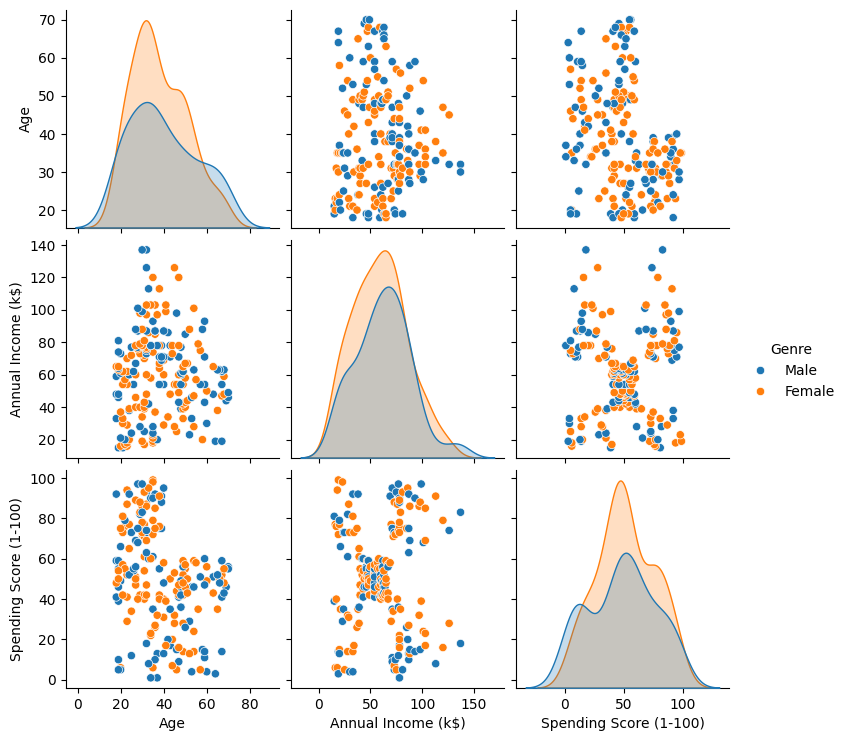

In [14]:
# Assuming 'Genre' is the intended column for hue and not 'Gender'
sns.pairplot(data.drop('CustomerID', axis=1), hue='Genre')

In [15]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

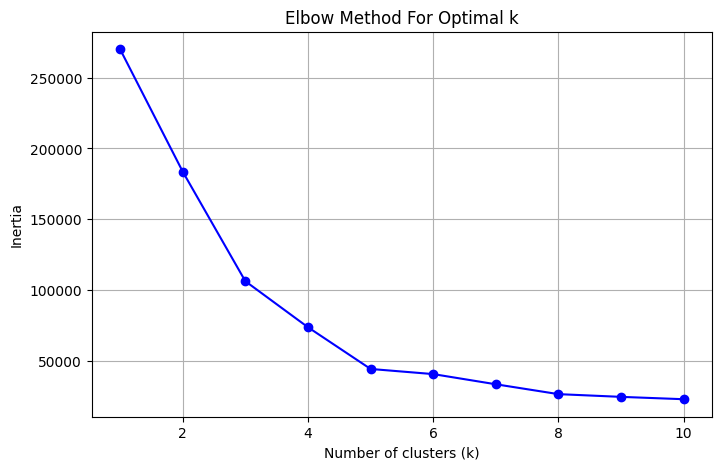

In [16]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [17]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)

# Add cluster labels to data
data['Cluster'] = clusters

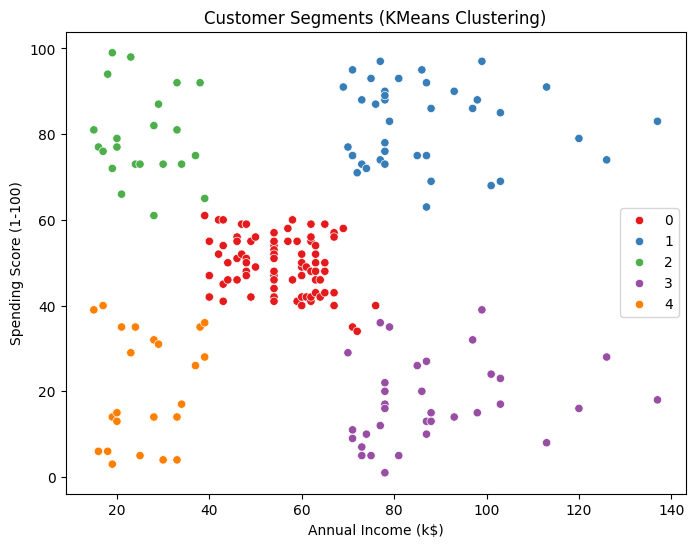

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=X, x='Annual Income (k$)', y='Spending Score (1-100)', hue=clusters, palette='Set1')
plt.title('Customer Segments (KMeans Clustering)')
plt.show()